In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import time
from tqdm import tqdm

In [3]:
with open('./data/mouitest_list.csv', encoding="UTF-8") as f:
    table = pd.read_csv(f)
df_moui = pd.DataFrame(table)
df_moui = df_moui.drop(['Unnamed: 4','order'], axis=1)
df_moui.head(2)

,sentence,video_id,title
0,"Dear Mr. Spencer,",127765,2019학년도 고2 3월 모의고사 18번
1,I will have lived in this apartment for ten ye...,127765,2019학년도 고2 3월 모의고사 18번


In [4]:
print('info:')
print(df_moui.info())
display(df_moui.describe().T)
df_moui.describe(include='O').T

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1839 non-null   object
 1   video_id  1847 non-null   int64 
 2   title     1847 non-null   object
dtypes: int64(1), object(2)
memory usage: 43.4+ KB
None


,count,mean,std,min,25%,50%,75%,max
video_id,1847.0,127866.825122,58.463444,127765.0,127816.0,127865.0,127916.0,127964.0


,count,unique,top,freq
sentence,1839,1831,Didn’t I tell you Santa would come?”,2
title,1847,200,2020학년도 고2 11월 모의고사 43-45번,46


In [6]:
cat_columns = [c for c, t in zip(df_moui.dtypes.index, df_moui.dtypes) if t=='O'] 
num_columns = [c for c in df_moui.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['sentence', 'title']

Numeric Columns: 
['video_id']



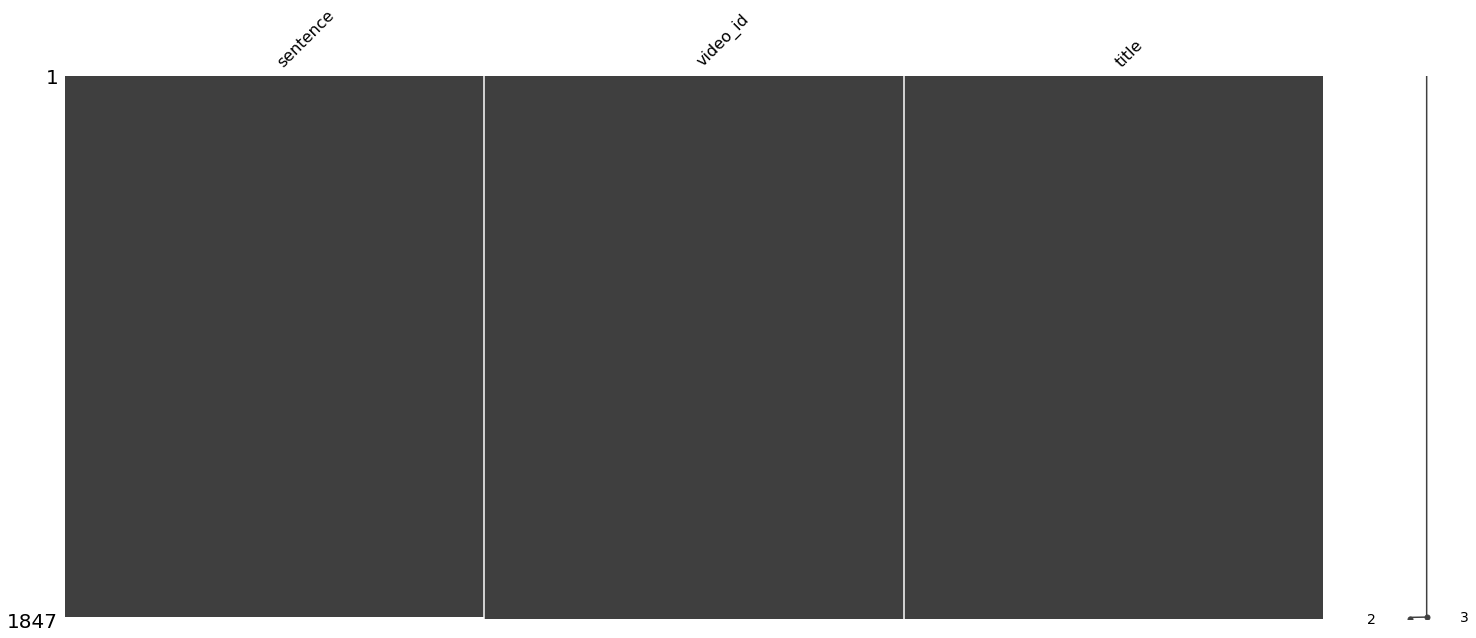

sentence    8
video_id    0
title       0
dtype: int64
sentence    0.004331
video_id    0.000000
title       0.000000
dtype: float64


In [8]:
msno.matrix(df_moui, sort='descending') # missingno
plt.show()
print(df_moui.isna().sum()) # 결측치 개수 확인
print(df_moui.isna().sum() / len(df_moui)) # 결측치 비율 확인